In [1]:
 # Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model

In [2]:
import pandas as pd                           
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Coffee consumption and production analysis for Russia,China,India,South Africa

## Analysis for China 

In [3]:
# import data for china 
file_path = 'integrated/china.csv'

df_china = pd.read_csv(file_path)
df_china

,year,country,id,coffee_consum,coffee_prod,gdp
0,2000,China,1003,0,0,1.211350e+12
1,2001,China,1003,0,0,1.339400e+12
2,2002,China,1003,117,324,1.470550e+12
3,2003,China,1003,156,386,1.660290e+12
4,2004,China,1003,222,361,1.955350e+12
5,2005,China,1003,172,365,2.285970e+12
6,2006,China,1003,226,428,2.752130e+12
7,2007,China,1003,164,433,3.550340e+12
8,2008,China,1003,338,555,4.594310e+12
9,2009,China,1003,1135,1173,5.101700e+12


### Coffee Consumption VS. GDP

In [4]:
x=np.array(df_china['gdp'])
x = x.reshape(-1,1)
y=np.array(df_china['coffee_consum'])
y=y.reshape(-1,1)

In [5]:
lm = linear_model.LinearRegression()

In [6]:
lm.fit(x,y)


LinearRegression()

In [7]:
y_hat = lm.predict(x)

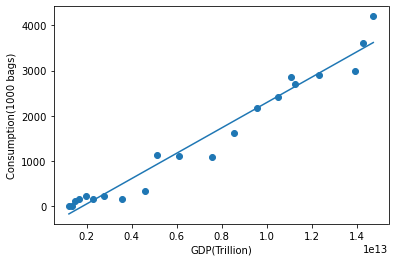

In [8]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('Consumption(1000 bags)')
plt.show()

### Coffee production vs. GDP 

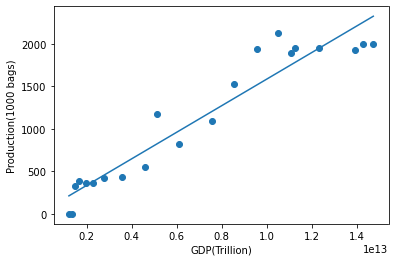

In [9]:
x=np.array(df_china['gdp'])
x = x.reshape(-1,1)
y=np.array(df_china['coffee_prod'])
y=y.reshape(-1,1)

lm = linear_model.LinearRegression()
lm.fit(x,y)
y_hat = lm.predict(x)
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('Production(1000 bags)')
plt.show()

### Prediction for consumption and production 

In [10]:
new_data=df_china[['year','coffee_consum']]


In [11]:
new_data.head()

,year,coffee_consum
0,2000,0
1,2001,0
2,2002,117
3,2003,156
4,2004,222


In [12]:
data_ch=new_data.set_index('year')

In [13]:
new_data.dtypes

year             int64
coffee_consum    int64
dtype: object

In [14]:
from datetime import date
from matplotlib.ticker import MaxNLocator

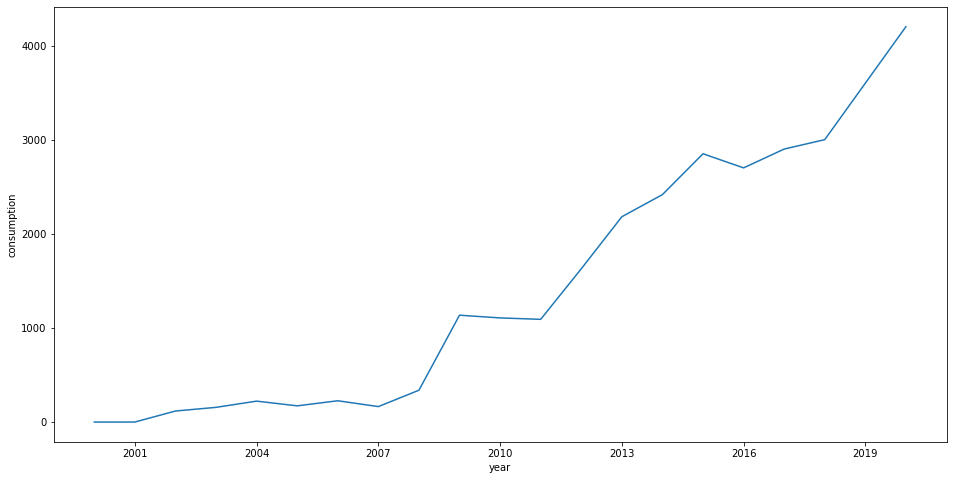

In [15]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('consumption')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(data_ch['coffee_consum'])

In [16]:
X=new_data['year'].tolist()
y = new_data['coffee_consum'].tolist()

In [17]:
X1=np.array(X).reshape(-1,1)

In [18]:
y1=np.array(y).reshape(-1,1)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

In [21]:

model.fit(X_train,y_train)



LinearRegression()

In [22]:
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.5976206192635045
296070.8304641544


In [23]:
#predict the consumption in the future five years 

In [24]:

model.predict([[2021]])


array([[3854.61329684]])

In [25]:
model.predict([[2022]])

array([[4061.1838294]])

In [26]:
model.predict([[2023]])

array([[4267.75436196]])

In [27]:
model.predict([[2024]])

array([[4474.32489451]])

In [28]:
model.predict([[2025]])

array([[4680.89542707]])

In [29]:
model.intercept_

array([-413624.43300262])

In [30]:
model.coef_

array([[206.57053256]])

In [31]:
# Production in China 

data=df_china[['year','coffee_prod']]


In [32]:
data.head()

,year,coffee_prod
0,2000,0
1,2001,0
2,2002,324
3,2003,386
4,2004,361


In [33]:
data_new = data.set_index('year')

In [34]:
data_new.head()

,coffee_prod
year,
2000,0
2001,0
2002,324
2003,386
2004,361


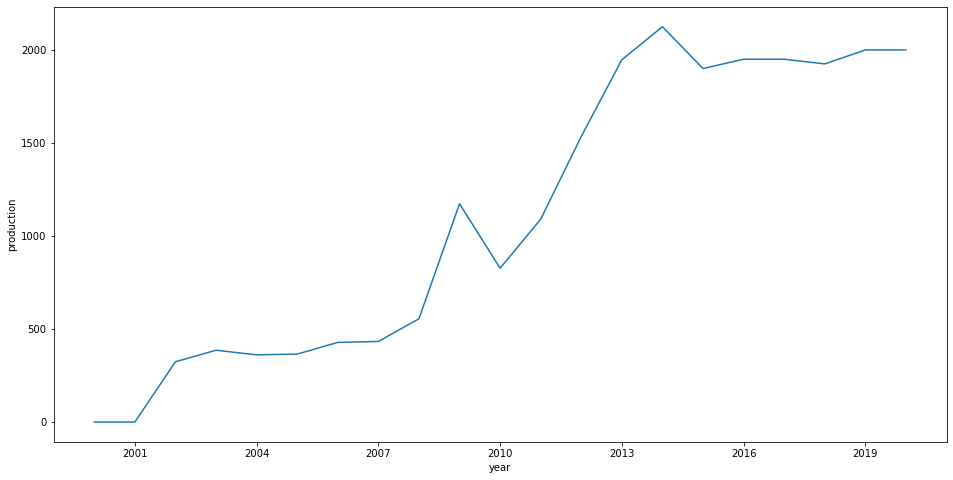

In [35]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('production')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(data_new['coffee_prod'], label='historical production')

In [36]:
X = data['year'].tolist()
y = data['coffee_prod'].tolist()

In [37]:
X1=np.array(X).reshape(-1,1)

In [38]:
y1=np.array(y).reshape(-1,1)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

In [40]:
model = LinearRegression()
model.fit(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1))

LinearRegression()

In [41]:
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9515841789629704
32703.804177047048


In [42]:
#predict the production in the future five years 

In [43]:
model.predict([[2021]])

array([[2425.02857143]])

In [44]:
model.predict([[2022]])

array([[2544.73246753]])

In [45]:
model.predict([[2023]])

array([[2664.43636364]])

In [46]:
model.predict([[2024]])

array([[2784.14025974]])

In [47]:
model.predict([[2025]])

array([[2903.84415584]])

In [48]:
model.intercept_

array([-239496.54545455])

In [49]:
model.coef_

array([[119.7038961]])

## Analysis on India 

In [50]:
#import analysis on India 

file_path = 'integrated/india.csv'

df_india = pd.read_csv(file_path)
df_india.head()

,year,country,id,coffee_consum,coffee_prod,GDP
0,2000,India,1004,959,5020,4.683950e+11
1,2001,India,1004,1000,5010,4.854410e+11
2,2002,India,1004,1050,4588,5.149380e+11
3,2003,India,1004,1085,4508,6.076990e+11
4,2004,India,1004,1135,4595,7.091490e+11


### Coffee Consumption VS. GDP

In [51]:
x=np.array(df_india['GDP'])
x = x.reshape(-1,1)
y=np.array(df_india['coffee_consum'])
y=y.reshape(-1,1)

In [52]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

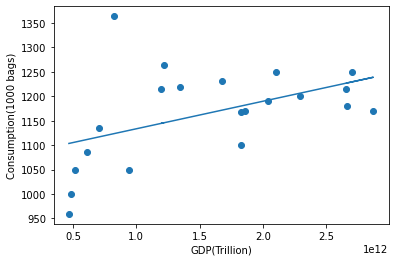

In [53]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('Consumption(1000 bags)')
plt.show()

### Coffee production vs. GDP

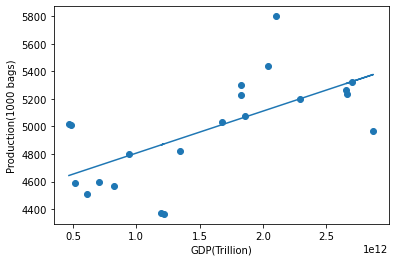

In [54]:
x=np.array(df_india['GDP'])
x = x.reshape(-1,1)
y=np.array(df_india['coffee_prod'])
y=y.reshape(-1,1)

lm = linear_model.LinearRegression()
lm.fit(x,y)
y_hat = lm.predict(x)
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('Production(1000 bags)')
plt.show()

### Prediction for consumption and production

In [55]:
# Consumption in India

In [56]:
in_data=df_india[['year','coffee_consum']]
#in_data=df_india.drop(columns='year')

In [57]:
in_data.head()

,year,coffee_consum
0,2000,959
1,2001,1000
2,2002,1050
3,2003,1085
4,2004,1135


In [58]:
new_in = in_data.set_index('year')

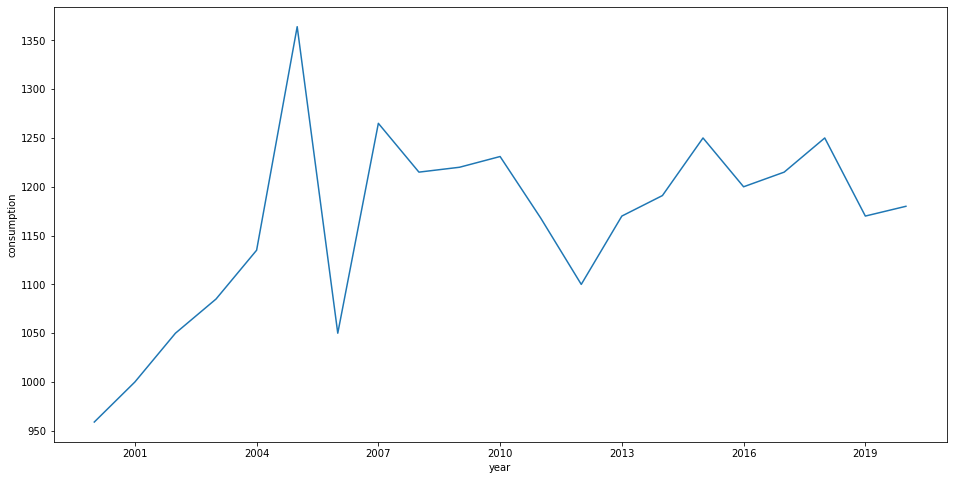

In [59]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('consumption')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(new_in['coffee_consum'], label='historical consumption')

In [60]:
X = in_data['year'].tolist()
y = in_data['coffee_consum'].tolist()

In [61]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

In [62]:
model = LinearRegression()
model.fit(X1,y1)

LinearRegression()

In [63]:
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2610295110677129
3216.783781413405


In [64]:
#predict the consumption in the future five years 

In [65]:
model.predict([[2021]])

array([[1251.81428571]])

In [66]:
model.predict([[2022]])

array([[1259.69350649]])

In [67]:
model.predict([[2023]])

array([[1267.57272727]])

In [68]:
model.predict([[2024]])

array([[1275.45194805]])

In [69]:
model.predict([[2025]])

array([[1283.33116883]])

In [70]:
model.intercept_

array([-14672.09090909])

In [71]:
model.coef_

array([[7.87922078]])

In [72]:
in_data=df_india[['year','coffee_prod']]

In [73]:
in_data.head()

,year,coffee_prod
0,2000,5020
1,2001,5010
2,2002,4588
3,2003,4508
4,2004,4595


In [74]:
in_prod=in_data.set_index('year')

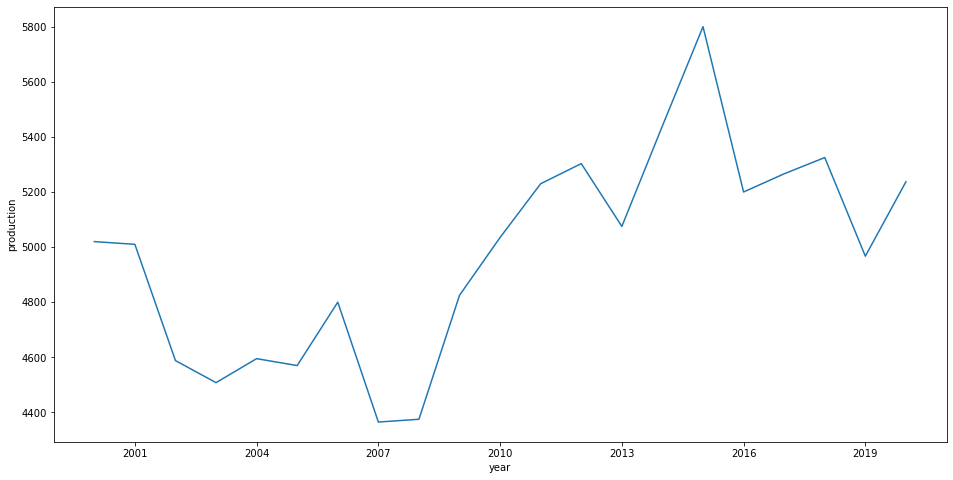

In [75]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('production')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(in_prod['coffee_prod'], label='historical production')

In [76]:
X = in_data['year'].tolist()
y = in_data['coffee_prod'].tolist()

In [77]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

model = LinearRegression()
model.fit(X1,y1)

y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.4239268778872791
73752.40807116918


In [78]:
model.predict([[2021]])

array([[5402.32380952]])

In [79]:
model.predict([[2022]])

array([[5440.91601732]])

In [80]:
model.predict([[2023]])

array([[5479.50822511]])

In [81]:
model.predict([[2024]])

array([[5518.1004329]])

In [82]:
model.predict([[2025]])

array([[5556.69264069]])

In [83]:
model.intercept_

array([-72592.52813853])

In [84]:
model.coef_

array([[38.59220779]])

In [85]:
model.score(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1))

0.39900491160113616

## Analysis on South Africa 

In [176]:
file_path = 'integrated/southafrica.csv'

df_sa = pd.read_csv(file_path)
df_sa.head()

,year,country,id,coffee_consum,coffee_import,GDP
0,2000,South Africa,1006,0,413,1.520000e+11
1,2001,South Africa,1006,0,337,1.350000e+11
2,2002,South Africa,1006,325,340,1.290000e+11
3,2003,South Africa,1006,360,360,1.970000e+11
4,2004,South Africa,1006,380,380,2.560000e+11


### Coffee Consumption VS. GDP

In [177]:
x=np.array(df_sa['GDP'])
x = x.reshape(-1,1)
y=np.array(df_sa['coffee_consum'])
y=y.reshape(-1,1)

In [178]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

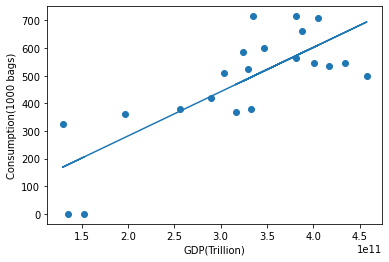

In [179]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('Consumption(1000 bags)')
plt.show()

### Coffee production vs. GDP

In [180]:
x=np.array(df_sa['GDP'])
x = x.reshape(-1,1)
y=np.array(df_sa['coffee_import'])
y=y.reshape(-1,1)

In [181]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

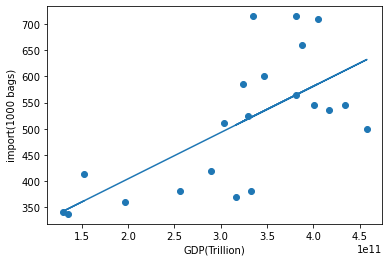

In [182]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('import(1000 bags)')
plt.show()

### Prediction for consumption and production

In [205]:
sa_data=df_sa[['year','coffee_consum']]

In [206]:
sa_data.head()

,year,coffee_consum
0,2000,0
1,2001,0
2,2002,325
3,2003,360
4,2004,380


In [207]:
new_sa = sa_data.set_index('year')

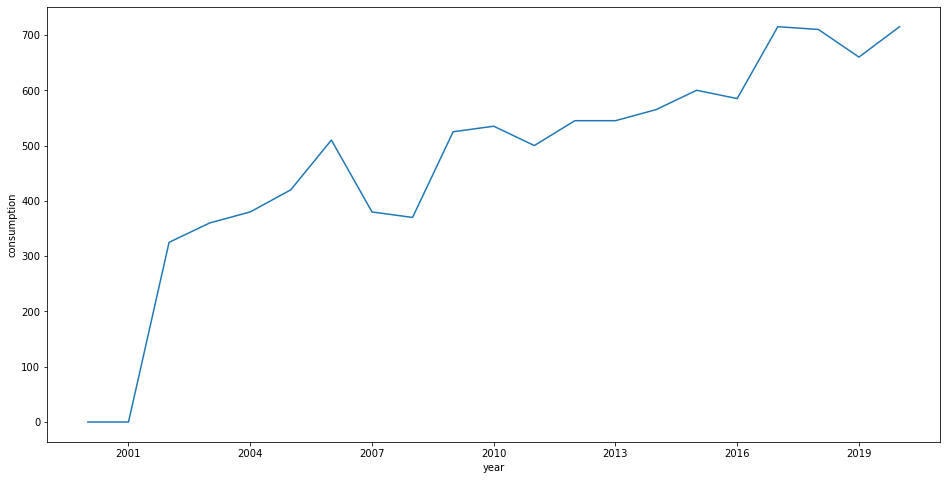

In [208]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('consumption')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(new_sa['coffee_consum'], label='historical consumption')

In [187]:
X = sa_data['year'].tolist()
y = sa_data['coffee_consum'].tolist()

In [209]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

model = LinearRegression()
model.fit(X1,y1)

y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.7876253235681455
10479.82344649801


In [99]:
# Prediction of consumption in five years 

In [210]:
model.predict([[2021]])

array([[785.35714286]])

In [211]:
model.predict([[2022]])

array([[813.7012987]])

In [212]:
model.predict([[2023]])

array([[842.04545455]])

In [213]:
model.predict([[2024]])

array([[870.38961039]])

In [214]:
model.predict([[2025]])

array([[898.73376623]])

In [218]:
model.intercept_

array([-56498.18181818])

In [219]:
model.coef_

array([[28.34415584]])

In [220]:
sa_data=df_sa[['year','coffee_import']]

In [221]:
new_sa=sa_data.set_index('year')

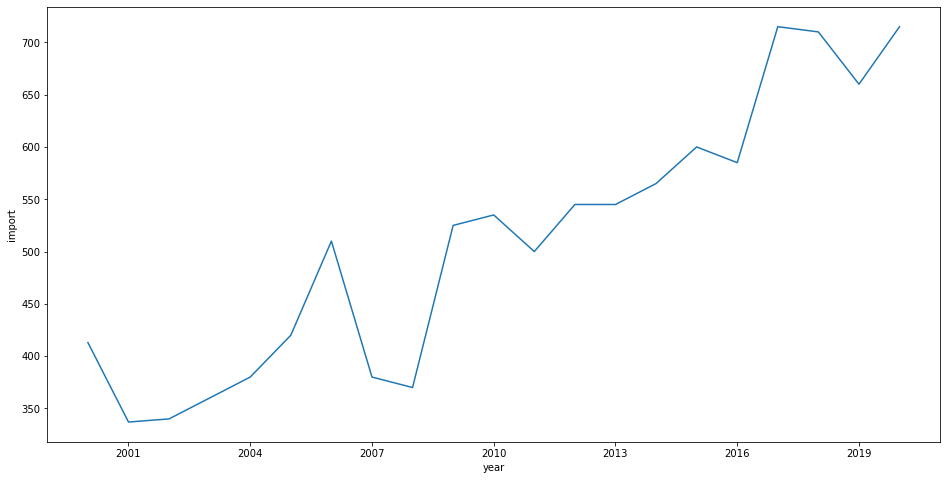

In [222]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('import')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(new_sa['coffee_import'])

In [223]:
X = sa_data['year'].tolist()
y = sa_data['coffee_import'].tolist()

In [225]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

model = LinearRegression()
model.fit(X1,y1)

y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8124228786788827
1438.2801166180593


In [226]:
model.predict([[2021]])

array([[717.74285714]])

In [227]:
model.predict([[2022]])

array([[736.62857143]])

In [228]:
model.predict([[2023]])

array([[755.51428571]])

In [229]:
model.predict([[2024]])

array([[774.4]])

In [230]:
model.predict([[2025]])

array([[793.28571429]])

In [231]:
model.score(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1))

0.8610954390598123

In [232]:
model.intercept_

array([-37450.28571429])

In [233]:
model.coef_

array([[18.88571429]])

## Analysis on Russia

In [234]:
file_path = 'integrated/russia.csv'

df_ru = pd.read_csv(file_path)
df_ru.head()

,year,country,id,coffee_consum,coffee_import,GDP
0,2000,Russia,1001,1863,1890,2.597100e+11
1,2001,Russia,1001,3032,3057,3.066020e+11
2,2002,Russia,1001,4050,3504,3.454700e+11
3,2003,Russia,1001,4065,3772,4.303480e+11
4,2004,Russia,1001,2570,3205,5.910170e+11


### Coffee Consumption VS. GDP

In [235]:
x=np.array(df_ru['GDP'])
x = x.reshape(-1,1)
y=np.array(df_ru['coffee_consum'])
y=y.reshape(-1,1)

In [236]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

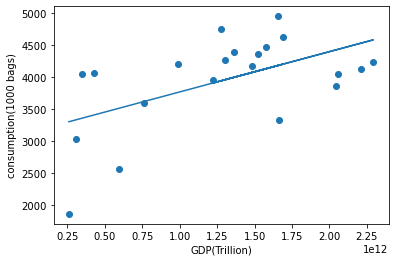

In [237]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('consumption(1000 bags)')
plt.show()

### Coffee import vs. GDP

In [238]:
x=np.array(df_ru['GDP'])
x = x.reshape(-1,1)
y=np.array(df_ru['coffee_import'])
y=y.reshape(-1,1)

In [239]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

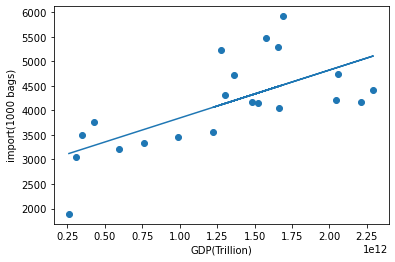

In [240]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('GDP(Trillion)')
plt.ylabel('import(1000 bags)')
plt.show()

### Prediction for consumption and production

In [241]:
ru_data=df_ru[['year','coffee_consum']]

In [242]:
ru_data.head()

,year,coffee_consum
0,2000,1863
1,2001,3032
2,2002,4050
3,2003,4065
4,2004,2570


In [243]:
new_ru = ru_data.set_index('year')

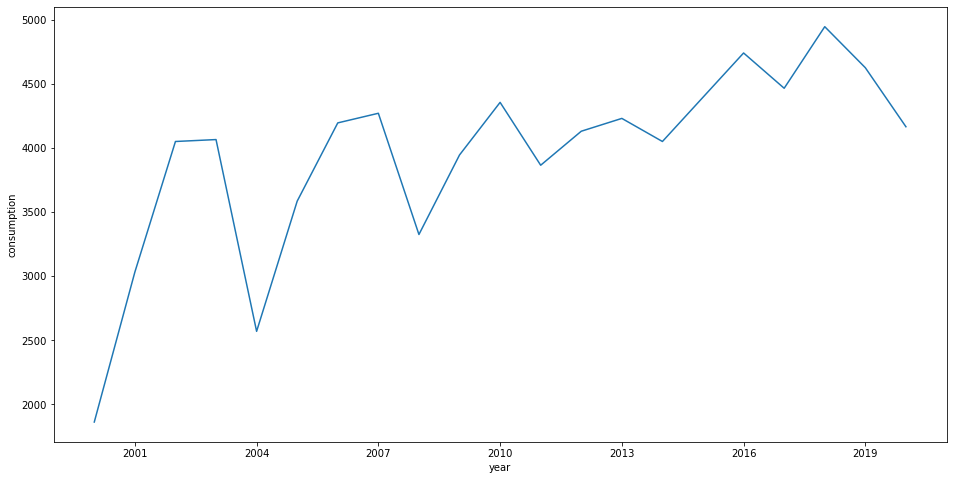

In [244]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('consumption')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(new_ru['coffee_consum'], label='historical consumption')

In [245]:
X = ru_data['year'].tolist()
y = ru_data['coffee_consum'].tolist()

In [246]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

model = LinearRegression()
model.fit(X1,y1)

y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.4547391596896315
363801.30422011967


In [247]:
#Prediction of consumption for next five years 

In [248]:
model.predict([[2021]])

array([[4877.62380952]])

In [249]:
model.predict([[2022]])

array([[4962.32121212]])

In [250]:
model.predict([[2023]])

array([[5047.01861472]])

In [251]:
model.predict([[2024]])

array([[5131.71601732]])

In [252]:
model.predict([[2025]])

array([[5216.41341991]])

In [253]:
model.intercept_

array([-166295.82683983])

In [254]:
model.coef_

array([[84.6974026]])

In [255]:
ru_data=df_ru[['year','coffee_import']]


In [256]:
ru_data.head()

,year,coffee_import
0,2000,1890
1,2001,3057
2,2002,3504
3,2003,3772
4,2004,3205


In [257]:
new_ru = ru_data.set_index('year')

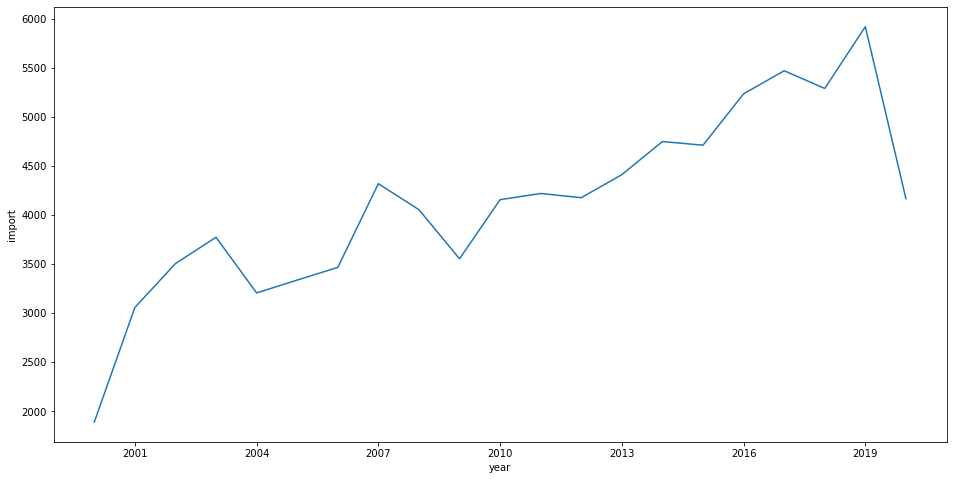

In [258]:
plt.figure(figsize=(16,8))
plt.xlabel('year')
plt.ylabel('import')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(new_ru['coffee_import'], label='historical import')

In [259]:
X = ru_data['year'].tolist()
y = ru_data['coffee_import'].tolist()

In [260]:
X1=np.array(X).reshape(-1,1)
y1=np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)

model = LinearRegression()
model.fit(X1,y1)

y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6548489563609643
247591.03001456376


In [148]:
# Prediction of import for next five years 

In [261]:
model.predict([[2021]])

array([[5554.02380952]])

In [262]:
model.predict([[2022]])

array([[5683.87445887]])

In [263]:
model.predict([[2023]])

array([[5813.72510823]])

In [264]:
model.predict([[2024]])

array([[5943.57575758]])

In [265]:
model.predict([[2025]])

array([[6073.42640693]])

In [266]:
model.intercept_

array([-256874.13852814])

In [267]:
model.coef_

array([[129.85064935]])

## Global coffee price vs. covid cases 

In [281]:
file_path = 'SQL db/coffee_covid.csv'

df = pd.read_csv(file_path)
df.head()

,DATE,PCOFFOTMUSDM,confirmed_cases
0,1/1/2020,150.36,9927.0
1,2/1/2020,145.86,86027.0
2,3/1/2020,161.46,876334.0
3,4/1/2020,163.70,3275297.0
4,5/1/2020,155.93,6176663.0


In [282]:
x=np.array(df['confirmed_cases'])
x = x.reshape(-1,1)
y=np.array(df['PCOFFOTMUSDM'])
y=y.reshape(-1,1)

In [283]:
lm = linear_model.LinearRegression()

lm.fit(x,y)

y_hat = lm.predict(x)

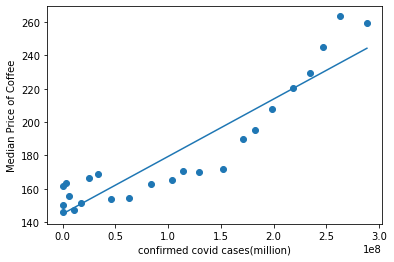

In [284]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.xlabel('confirmed covid cases(million)')
plt.ylabel('Median Price of Coffee')
plt.show()

In [285]:
import datetime as dt
from datetime import datetime

In [286]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [287]:
new_df=df.set_index('DATE')


In [288]:
df['date']=df['DATE'].map(dt.datetime.toordinal)

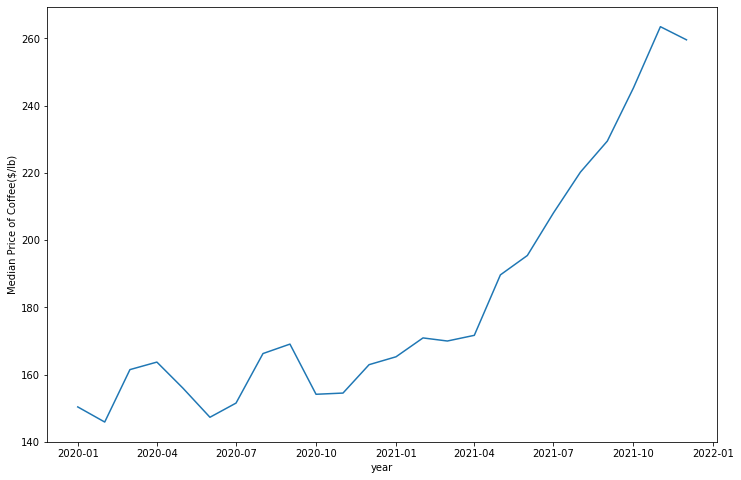

In [289]:
plt.figure(figsize=(12,8))
plt.xlabel('year')
plt.ylabel('Median Price of Coffee($/lb)')
plt.plot(new_df['PCOFFOTMUSDM'])

In [290]:
data = df[['DATE','PCOFFOTMUSDM']]

In [291]:
data.head()

,DATE,PCOFFOTMUSDM
0,2020-01-01,150.36
1,2020-02-01,145.86
2,2020-03-01,161.46
3,2020-04-01,163.70
4,2020-05-01,155.93


In [292]:
x1 = np.arange(df['date'].size)
y = data['PCOFFOTMUSDM'].values
y1 = np.array(y)

x1=x1.reshape(-1,1)
y1=y1.reshape(-1,1)

In [293]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)

In [294]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [295]:
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8249117451114399
267.01184187203415


In [296]:
lr.fit(x1,y1)


LinearRegression()

In [297]:
print('Slope: %.3f' % lr.coef_[0]) 
print('Intercept : %.3f' % lr.intercept_) 

Slope: 4.475
Intercept : 130.706


In [298]:

def Regression_plot(a, b, model):
    plt.plot(data['DATE'], b, c='blue')
    plt.plot(data['DATE'], model.predict(a), color='red')
    return None

Text(0, 0.5, 'coffee median price($/lb)')

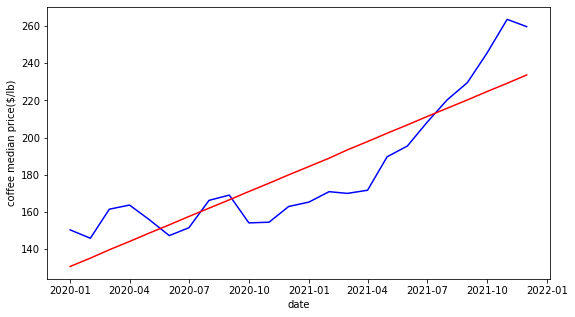

In [299]:

import matplotlib.ticker as tkr
plt.figure(figsize=(9,5))
Regression_plot(x1, y1, lr)

plt.xlabel('date')
plt.ylabel('coffee median price($/lb)')

In [300]:
d = {'Predict':y_pred,'True':y_test}
d

{'Predict': array([[228.42939052],
        [163.42424194],
        [212.17810338],
        [187.80117266],
        [139.04731122],
        [171.54988551],
        [179.67552908],
        [216.24092516]]),
 'True': array([[259.6 ],
        [166.24],
        [220.22],
        [170.89],
        [145.86],
        [154.12],
        [162.93],
        [229.48]])}